## OTROS MODELOS: K-NEAREST NEIGHBOURS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Para introducir el KNN volvemos a encontrarnos con un personaje tan querido como odiado: Dena Aidone. En esta ocasión le han planteado un problema diferentes. Y sí, si crees que vuelven los vectores y las distancias, estás en lo cierto pero ya no tendrás que crearlos a mano, ni con numpy, solo recordarlos un poco. Vamos con Dena.

### Un nuevo problema para Dena Aidone: Harry Potter o Katnis Everdeen

La dirección se está planteando renovar la mediateca y quiere saber si debe invertir más en las películas de Harry Potter o en las de Los Juegos del Hambre, para eso le gustaría saber si sus alumnos prefieren unas u otras pero no quiere preguntarles directamente porque ya les atiborra a mil encuestas. Así que le pide ayuda a Dena Aidon. 

Esta les propone hacer un modelo de predicción basado en algo llamado Boosted Trees que a la dirección le suena a chino espacial y le dice que no hay más dinero para ordenadores. Que solo dispone de los datos de las encuestas del pasado (o sea las de su clase en las que sí se preguntaba por Harry Potter y por Katnis Everdeen) y las encuestas actuales (en las que no).

Resumiendo:

- Dena parte del siguiente dataset de entrenamiento:


In [2]:

alumnos_aidone = {'Rodrigo': [1.63, 81, 0],
 'Lucia': [1.5, 74, 1],
 'Alejandro': [1.5, 54, 0],
 'Valeria': [1.93, 64, 1],
 'Javier': [1.5, 66, 0],
 'Camila': [1.71, 71, 1],
 'Diego': [1.95, 45, 1],
 'Gabriela': [1.54, 49, 0],
 'Mateo': [1.86, 50, 1],
 'Sofía': [1.77, 70, 0]
 }


Y tiene que predecir el gusto del siguiente dataset de test:

In [3]:
nuevos_alumnos = {
 'William': [1.52, 72],
 'Emily': [1.52, 52],
 'Alexander': [1.93, 65],
 'Olivia': [1.51, 68],
 'Benjamin': [1.73, 69],
 'Sophia': [1.96, 40],
 'Henry': [1.55, 51],
 'Isabella': [1.87, 53],
 'James': [1.77, 70],
 'Charlotte': [1.65, 84]
}

En el que los vectores corresponde a la altura, el peso y 0 para los que prefieren a Harry y 1 para los fans de Katnis (en el caso de los nuevos alumnos). Son muy pocos datos para un algoritmo de los que hemos aprendido, así que tira de caja de herramientas y decide aplicar un KNN. 

# KNN:

El K-NN (K-Nearest Neighbours) para clasificación es un algoritmo muy sencillo: Dado un dataset de entrada, si quiero predecir una variable para un nuevo elemento o instancia, se procede así:

1- Obtengo los K elementos del dataset de train que están más cerca del nuevo elemento. Sí, como cuando veíamos que alumno tenía un vector a menor distancia de los alumnos de referencia, pero ahora escojo los K más cercanos. Utilizo todas las variables o dimensiones del vector disponibles menos la que quiero calcular. 

2- Si la variable es categórica, se obtiene el hard-voting de los vecinos es decir se asigna la moda para dicha variable de los vecinos escogidos en el paso anterior.

3- Si la variable es numérica, se obtiene la media para los vecinos y esa media es el valor que se "predice" o asigna.

Así de sencillo... No, no vamos a programarlo, dejaremos que `sklearn` haga el trabajo por nosotros. Pero antes véamoslo a mano con nuestra clase.

**La clase de Dena**

El siguiente diagrama ilustra la clase de Dena en la que hemos incluido a William y a Sophia, dos de los nuevos alumnos para los que hay que "predecir" el gusto:

In [4]:


def pinta_alumnos(diccionario_vectores, etiquetas_leyendas = ["Harry","Katnis"], etiquetas_colores = ["black","red"]):
    # Separar los componentes de los vectores y las claves
    fig, axs = plt.subplots(figsize = (7,7))
    xs = {}
    ys = {}
    colores = {}
    etiquetas = {}
    for etiqueta in etiquetas_leyendas:
        xs[etiqueta] =[]
        ys[etiqueta] = []
        colores[etiqueta] = []
        etiquetas[etiqueta] = []

    for clave, vector in diccionario_vectores.items():
        xs[etiquetas_leyendas[vector[2]]].append(vector[0])
        ys[etiquetas_leyendas[vector[2]]].append(vector[1])
        colores[etiquetas_leyendas[vector[2]]].append(etiquetas_colores[vector[2]])
        etiquetas[etiquetas_leyendas[vector[2]]].append(clave)

    # Crear el scatter plot
    for etiqueta in etiquetas_leyendas:
        if etiqueta in xs:
            axs.scatter(xs[etiqueta], ys[etiqueta], c=colores[etiqueta], label = etiqueta)
            for i, nombre in enumerate(etiquetas[etiqueta]):
                axs.annotate(nombre, (xs[etiqueta][i], ys[etiqueta][i]))
    
    # Anotar cada punto con su clave
    

    # Configurar el gráfico
    axs.grid(False) # Desactivar la rejilla
    axs.set_xlabel("Altura")
    axs.set_ylabel("Peso")
    axs.legend()
    return axs

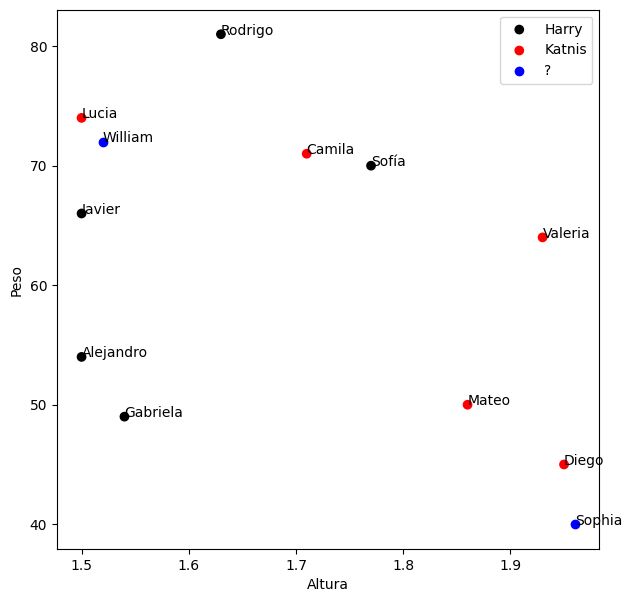

In [6]:
fig = pinta_alumnos(alumnos_aidone)
vec_will = nuevos_alumnos["William"]
vec_soph = nuevos_alumnos["Sophia"]
fig.scatter([vec_will[0],vec_soph[0]],[vec_will[1], vec_soph[1]], color = "blue", label = "?")
plt.annotate("William",(vec_will))
plt.annotate("Sophia", (vec_soph))
fig.legend();

Suponiendo K = 3:

- La predicción de William saldrá de considerar a Lucia, Rodrigo y Javier
- La predicción de Sophia saldrá de considerar a Diego, Mateo, Valeria

### Implementacion

Veamos como se implementa:

In [7]:
# Convertimos los diccionarios en X,y

train_set = pd.DataFrame([(clave,vec[0],vec[1],vec[2]) for clave,vec in alumnos_aidone.items()], columns = ["alumno","altura","peso","preferencia"])
train_set.set_index("alumno", inplace = True)
train_set

,altura,peso,preferencia
alumno,,,
Rodrigo,1.63,81,0
Lucia,1.50,74,1
Alejandro,1.50,54,0
Valeria,1.93,64,1
Javier,1.50,66,0
Camila,1.71,71,1
Diego,1.95,45,1
Gabriela,1.54,49,0
Mateo,1.86,50,1


In [8]:
test_set = pd.DataFrame([(clave,vec[0],vec[1]) for clave,vec in nuevos_alumnos.items()], columns = ["alumno","altura","peso"])
test_set.set_index("alumno",inplace = True)
test_set

,altura,peso
alumno,,
William,1.52,72
Emily,1.52,52
Alexander,1.93,65
Olivia,1.51,68
Benjamin,1.73,69
Sophia,1.96,40
Henry,1.55,51
Isabella,1.87,53
James,1.77,70


In [9]:

knn = KNeighborsClassifier(n_neighbors=3)

X = train_set[['altura','peso']].copy()
y = train_set['preferencia']

knn.fit(X,y)

prediccion = knn.predict(test_set)
test_set["Prediccion"] = np.where(prediccion == 0, "Harry","Katnis")
test_set

,altura,peso,Prediccion
alumno,,,
William,1.52,72,Katnis
Emily,1.52,52,Harry
Alexander,1.93,65,Harry
Olivia,1.51,68,Harry
Benjamin,1.73,69,Harry
Sophia,1.96,40,Katnis
Henry,1.55,51,Harry
Isabella,1.87,53,Harry
James,1.77,70,Katnis


Hmmm pero esto no es lo que esperábamos... es sensible a la escala

### Sensible a la escala  

Tenemos que escalar:

In [10]:
scaler = StandardScaler()
X[["altura","peso"]] = scaler.fit_transform(X[["altura","peso"]])
test_set[["altura","peso"]] = scaler.transform(test_set[["altura","peso"]])

In [11]:

knn.fit(X,y)

prediccion = knn.predict(test_set[["altura","peso"]])
test_set["Prediccion"] = np.where(prediccion == 0, "Harry","Katnis")
test_set

,altura,peso,Prediccion
alumno,,,
William,-0.983473,0.831052,Harry
Emily,-0.983473,-0.900306,Harry
Alexander,1.402467,0.225077,Katnis
Olivia,-1.041666,0.484780,Katnis
Benjamin,0.238594,0.571348,Harry
Sophia,1.577048,-1.939121,Katnis
Henry,-0.808892,-0.986874,Harry
Isabella,1.053305,-0.813738,Katnis
James,0.471369,0.657916,Katnis


### Selección de la K

• La mejor elección de k depende fundamentalmente 
de los datos.  
• No existen métodos estadísticos predefinidos para 
encontrar el valor más favorable de K.  
• Iniciamos un valor K aleatorio y calculamos.  
• Investigación “iterativa”.  
• Elegir valores pequeños de K conduce a límites de 
decisión muy sensibles o inestables.   
• Para clasificar, elegir valores mayores de K nos 
suaviza esos límites de decisión (reducimos efecto 
ruido)

# Otros Modelos: Polynomial regression/Regresión Polinómica


### Concepto y modelado


En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


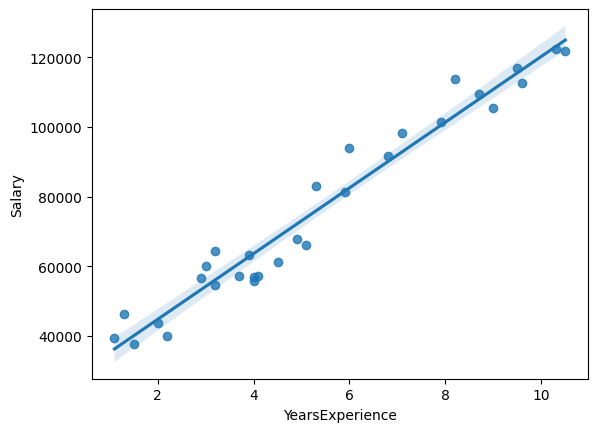

In [13]:
sns.regplot(data=df,  # regplot una nueva herramienta visual para tu caja de herramientas
            x="YearsExperience",
            y="Salary");

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [14]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Vamos a construir un modelo que tenga en cuenta el "nivel" profesional

In [15]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

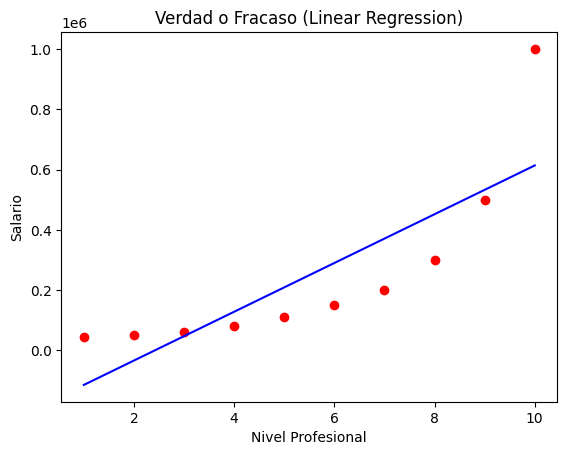

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Verdad o Fracaso (Linear Regression)')
    plt.xlabel('Nivel Profesional')
    plt.ylabel('Salario')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas. Observa los errores:

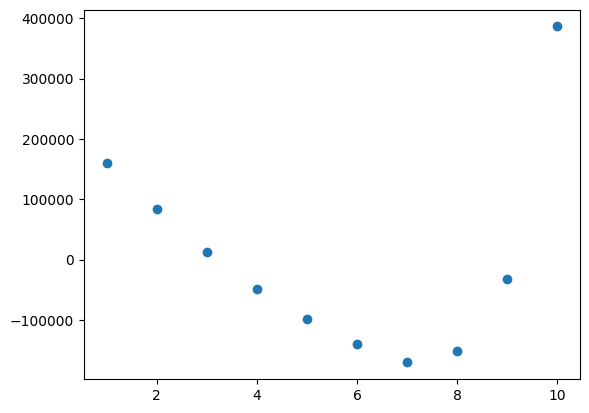

In [17]:
plt.scatter(X, y - lin_reg.predict(X));

Y aquí es donde entra la **regresión polinómica** que consiste en aplicar una transformación a nuestra $y = a_0 + a_1*x_1 + a_2*x_2 + a_3*x_3 + ...$ (donde $x_i$ son las features y $a_i$ los coeficientes o pesos o parámetros de una regresión lineal) sencilla pero potente. En vez de esa relación vamos a utilizar también los cuadrados, cubos, etc de las mismas features y de los productos de las mismas:

$$y = a_0 + a_1*x_1 + a_2*x_1^2 + a_3*(x_1*x_2) + a_4*x_2^2 + a5*x_3^2 + a_6*(x_1*x_3) + a_7*(x_2*x_3) + a_8*x_1^3...$$

El grado de la regresión polinómica es el máximo exponente al que elevaremos las features (en el caso anterior sería 3). Por otro lado, fíjate que es como crear una regresión lineal incluyendo las features "creadas" o "sintéticas" ($x_1^2, x_2^2, x_3^2, x_1^3, x_2^3, x_3^3, x_1*x_2,x_1*x_3,x_2*x_3,x_1*x_2^2,...$, etc)

Por supuesto, `sklearn` tiene su clase que se encarga de obtener esas features "sintéticas" y luego nosotros haremos la regresión lineal con todo el nuevo conjunto de datos. Eso sí, tendrás que indicarle el grado :-) a través del argumento `degree`. La clase es `PolynomialFeatures`. Veamos cómo, pero antes observa que también crea los productos combinados de features:

In [18]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X)
X_poly = poly_reg.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

Como solo teniamos una feature ($x_1$) creará un nuevo dataset con:

$$(x_1^0, x_1^1, x_1^2, x_1^3)$$

Ahora ejecutamos el modelado y veamos la comparativa:

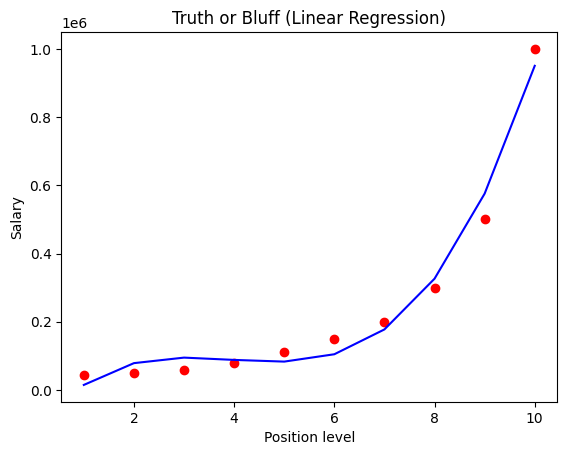

In [20]:

# Linear regression
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

### Sobreajuste

El problema es que si añadimos mucha complejidad (empleamos grados muy altos) podemos sobreajustar el modelo fácilmente. Por ejemplo ejecutemos la siguiente celda (en la que se crean unos datos sintéticos y luego se ajusta un modelo de regresión polinómica forzado para el sobreajuste)

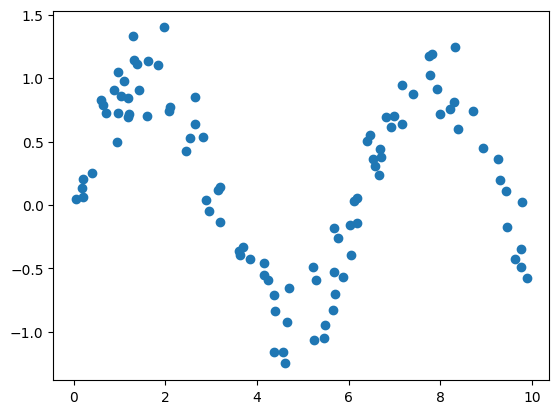

In [21]:


# Paso 1: Generar datos sintéticos
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 puntos aleatorios entre 0 y 10
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # y = sin(x) con ruido
plt.scatter(X,y);


In [22]:

# Paso 2: Ajustar un modelo de regresión polinómica de alto grado
grado = 15  # Grado del polinomio
poly_overfitting = PolynomialFeatures(degree= grado)
X_poly = poly_overfitting.fit_transform(X)
modelo = LinearRegression()
modelo.fit(X_poly, y)


LinearRegression()

In [23]:
X

array([[5.48813504],
       [7.15189366],
       [6.02763376],
       [5.44883183],
       [4.23654799],
       [6.45894113],
       [4.37587211],
       [8.91773001],
       [9.63662761],
       [3.83441519],
       [7.91725038],
       [5.2889492 ],
       [5.68044561],
       [9.25596638],
       [0.71036058],
       [0.871293  ],
       [0.20218397],
       [8.32619846],
       [7.78156751],
       [8.70012148],
       [9.78618342],
       [7.99158564],
       [4.61479362],
       [7.80529176],
       [1.18274426],
       [6.39921021],
       [1.43353287],
       [9.44668917],
       [5.21848322],
       [4.1466194 ],
       [2.64555612],
       [7.74233689],
       [4.56150332],
       [5.68433949],
       [0.187898  ],
       [6.17635497],
       [6.12095723],
       [6.16933997],
       [9.43748079],
       [6.81820299],
       [3.59507901],
       [4.37031954],
       [6.97631196],
       [0.60225472],
       [6.66766715],
       [6.7063787 ],
       [2.10382561],
       [1.289

In [24]:
X_poly

array([[1.00000000e+00, 5.48813504e+00, 3.01196262e+01, ...,
        4.09753108e+09, 2.24878039e+10, 1.23416104e+11],
       [1.00000000e+00, 7.15189366e+00, 5.11495830e+01, ...,
        1.28077733e+11, 9.15998328e+11, 6.55112264e+12],
       [1.00000000e+00, 6.02763376e+00, 3.63323688e+01, ...,
        1.38646572e+10, 8.35710760e+10, 5.03735839e+11],
       ...,
       [1.00000000e+00, 2.01075462e-01, 4.04313414e-02, ...,
        8.78350746e-10, 1.76614782e-10, 3.55128989e-11],
       [1.00000000e+00, 8.28940029e+00, 6.87141572e+01, ...,
        8.72570361e+11, 7.23308500e+12, 5.99579369e+13],
       [1.00000000e+00, 4.69547619e-02, 2.20474967e-03, ...,
        5.39306131e-18, 2.53229910e-19, 1.18903501e-20]])

In [25]:
X_poly.shape

(100, 16)

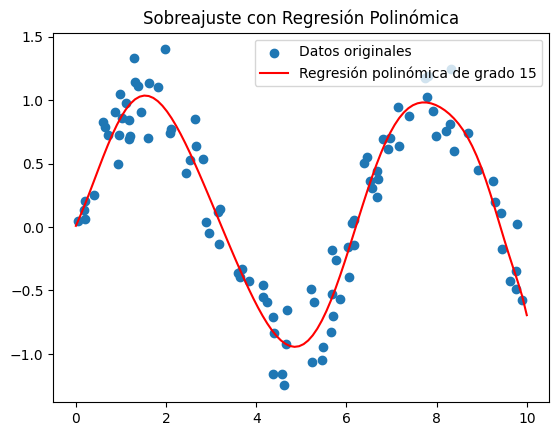

In [26]:


# Paso 3: Visualizar los resultados
X_test = np.linspace(0, 10, 100)[:, np.newaxis]
X_test_poly = poly_overfitting.transform(np.linspace(0, 10, 100)[:, np.newaxis])
y_pred = modelo.predict(X_test_poly)

plt.scatter(X, y, label="Datos originales")
plt.plot(X_test, y_pred, color='red', label=f"Regresión polinómica de grado {grado}")
plt.legend()
plt.title("Sobreajuste con Regresión Polinómica")
plt.show()


El ajuste es casi perfecto, lo cual quiere decir que en la realidad con datos nuevos que cambiarán algo el patrón el modelo dejará de generalizar perfectamente (olvida por un momento que hemos hecho los datos sintéticos)

### Predicciones

Y para terminar, para obtener las predicciones de un nuevo valor (o de un conjunto de test), observa que en realidad hemos aplicado una transformación al train (como hacemos cuando aplicamos logaritmos para normalizar algunas distribuciones) y por tanto lo que hay que hacer es aplicar dicha tranformación a los datos de entrada.

In [27]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.transform([[5.5]])))

[249500.]
[89187.5]


In [28]:
pol_reg.coef_.shape

(4,)

# Otros Modelos: Support Vector Machine

### Concepto y modelado lineal para clasificación


En esta primera parte te explico muy por encima el concepto que hay detrás del modelo, pero no es fundamental que lo memorices.

Partimos de este conjunto de datos y queremos hacer un modelo de clasificación

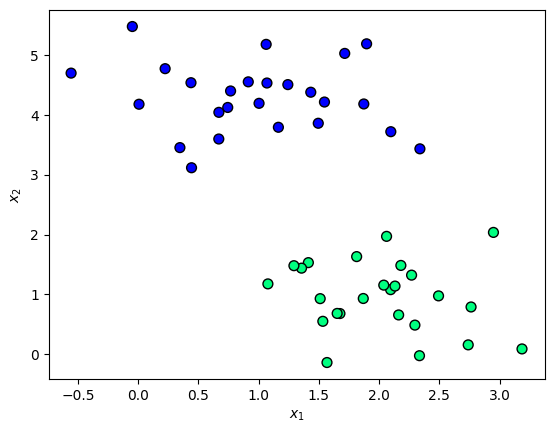

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

Existen infinitos separadores (modelos) que separan perfectamente ambas clases

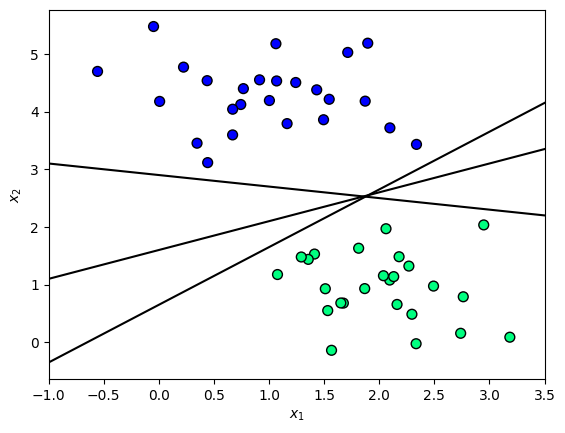

In [30]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')


for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

¿Cuál es el mejor separador? 

Empecemos analizando cuál es el separador de la regresión logística

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X,y)
lr.intercept_, lr.coef_

(array([4.81393202]), array([[ 0.57306256, -2.18013484]]))

$\Large y = \theta(4.81 + 0.573x_1 - 2.18x_2)$, donde $\Large \theta$ es la función sigmoide:

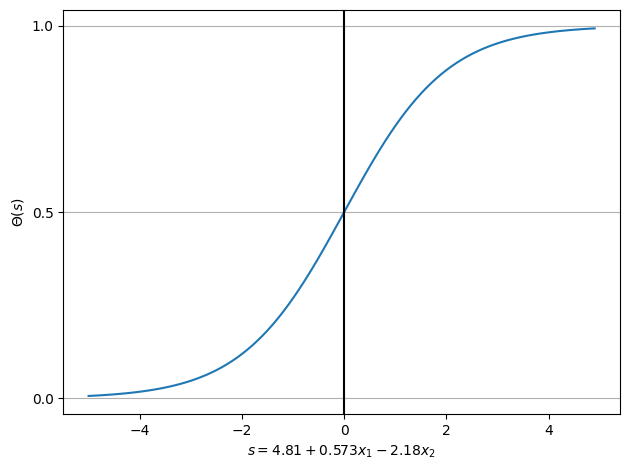

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.arange(-5, 5, 0.1)
phi_z = sigmoid(z)
 
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('$s=4.81 + 0.573x_1 - 2.18x_2$')
plt.ylabel('$\Theta(s)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

En regresión logística, la predicción queda determinada por la ecuación $\theta(s)=\theta(w_0+w_1x_1+w_2x_2+...+w_Nx_N)$. Cuando $s=0$,  $\theta(s)=0.5$, que suele ser el umbral para clasificar una categoría u otra. 

En este ejemplo $s=4.81 + 0.573x_1 - 2.18x_2$. Si igualamos a cero, obtenemos la ecuación de la recta separadora:

$4.81 + 0.573x_1 - 2.18x_2=0$  
  
$2.18x_2 = 0.573x_1 + 4.81$   
  
$x_2=\frac{0.573}{2.18}x_1 + \frac{4.81}{2.18}$
  
$x_2 = 0.263x_1 + 2.206 $

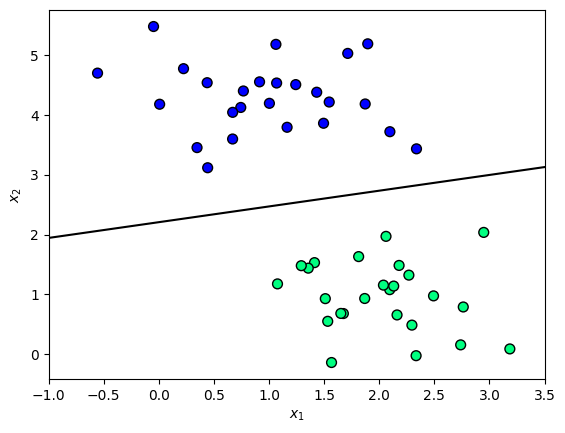

In [33]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
m=0.263
b=2.206
plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

**Support vector machines** busca establecer un separador con el mayor margen posible a las muestras más cercanas

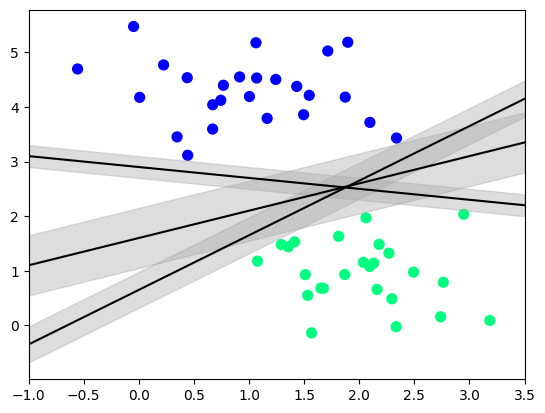

In [34]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

La recta separadora que maximice este margen será escogida como el mejor modelo.

In [35]:
from sklearn.svm import SVC # "support vector classifier"

model = SVC(kernel='linear', C=1e10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

Fíjate por un segundo antes de seguir que existe ese argumento kernel (luego volveremos a él)

In [36]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1,facecolors='none', edgecolors='r');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

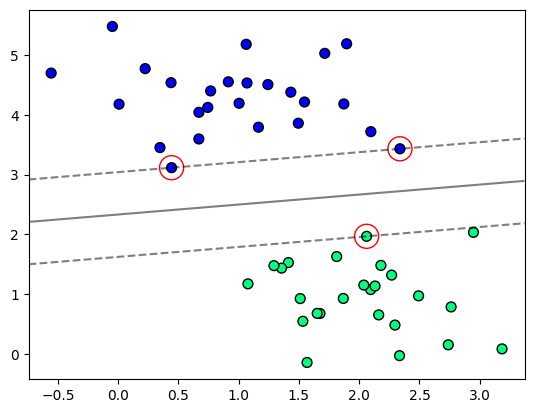

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');
plot_svc_decision_function(model);


Esta recta separadora maximiza el margen entre los dos conjuntos de puntos. Fíjate que alguno de los puntos están justo en el margen, indicados con círculos rojos. Estos puntos son los vectores de soporte, que dan nombre al algoritmo.

In [38]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Si pintamos la recta de la regresión logística que calculamos anteriormente, vemos que no es exactamente la misma

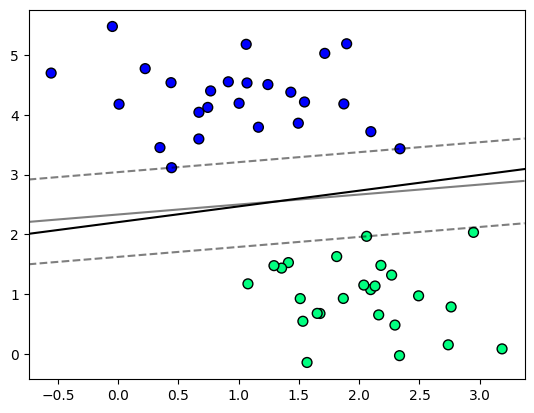

In [39]:
# Datos
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='winter', edgecolors='k')

# SVM
plot_svc_decision_function(model, plot_support=False)

# Regresión Logística
xfit = np.linspace(-1, 3.5)
m=0.263
b=2.206
plt.plot(xfit, m * xfit + b, '-k')

### Matizaciones


* Este algoritmo es sensible al escalado de las variables  

* Este algoritmo es muy sensible a outliers, hay que tratarlos (quitarlos y luego considerar esos puntos con otro modelo por ejemplo)

* Es muy sensible a la existencia de una zona de soporte (de margen entre las clases). Por eso tiene un hiperparámetros C que permite que algunos puntos caigan en la zona de soporte o seguridad. A C más alto más estricto.


En general no es un modelo que nosotros vayamos a utilizar, pero puede que tú si quieras probarlo y alguna vez lo necesites. [Aquí](https://scikit-learn.org/stable/modules/svm.html) tienes una referencia para profundizar más. Nosotros vamos a limitarnos a presentar otros "kernels" y su concepto y ahí lo dejamos.

### Kernels: SVM como clasificadores no lineales

Una forma un poco "grosera" de ver la generalización de este tipo de modelos es considerar los conceptos del apartado anterior pero en que antes de aplicarlos a los datos se les transforma (como hacíamos con la transformación a polinomio de las regresiones lineales en la sesión anterior). A esa transformación previa se le denomina "kernelización" o sea aplicación de un kernel o transformación. De hecho SVM tiene un "kernel" ("poly") con el que se imita prácticamente una regresión polinómica.

Vamos a ver dos kernel (no hace falta que te aprendas la fórmula matemática que sigue es por pura completitud teórica)[NOTA: ya hemos visto una más el "linear" que es el que hemos aplicado antes]

**Kernel polinómico**: Transformamos la dimensión de entrada a través de un polinomio de grado *d*. Por ejemplo, para $d=2$: 
$(x_1, x_2) \rightarrow (x_1, x_2, x_1x_2, x_1^2, x_2^2)$  

**Kernel RBF (Radial Basis Function)**: traslada los datos a una dimensión infinita  
$(x_1, x_2) \rightarrow \exp(-\gamma||x_1 - x_2||^2)$

Veamos algún ejemplo con datos no linealmente separables

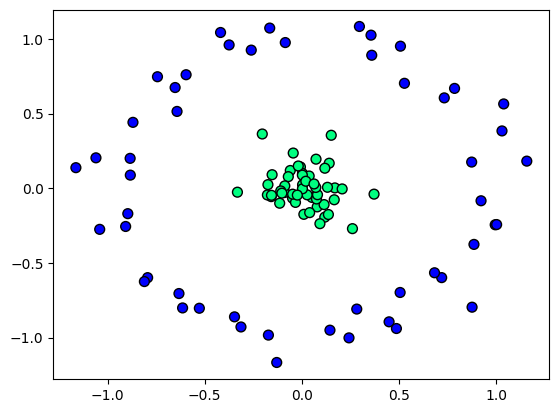

In [43]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');

**Kernel lineal**

In [44]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear').fit(X,y) # Se instancia igual, solo hay que cambiar el argumenot 'kernel'

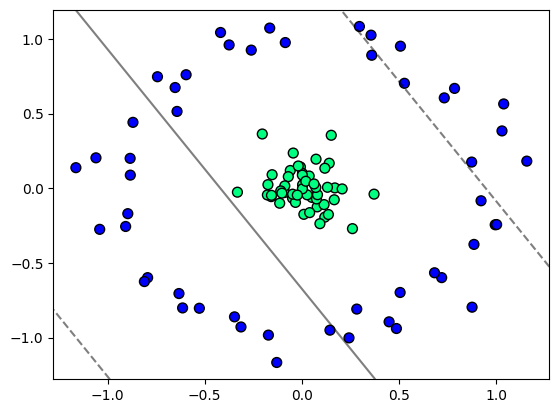

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf, plot_support=False);

**Kernel polinómico de grado 2**

In [46]:
clf = SVC(kernel='poly', degree=2,C=1e6)
clf.fit(X,y)

SVC(C=1000000.0, degree=2, kernel='poly')

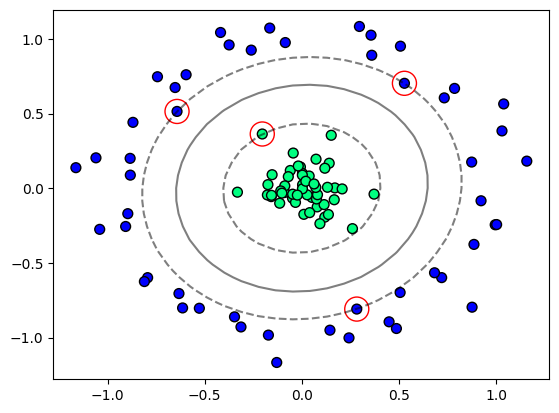

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

**Kernel RBF**

In [48]:
clf = SVC(kernel='rbf', C=1e6)
clf.fit(X,y)

SVC(C=1000000.0)

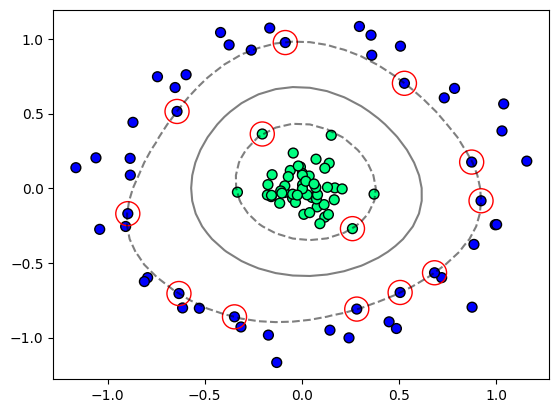

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### SVM en regresión

Aunque SVM es conocido por ser un modelo de clasificación, también puede utilizarse en regresiones, siendo su planteamiento muy similar, aunque no vamos a profundizar en ello, solo vamos a ver cómo se aplica:


In [50]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

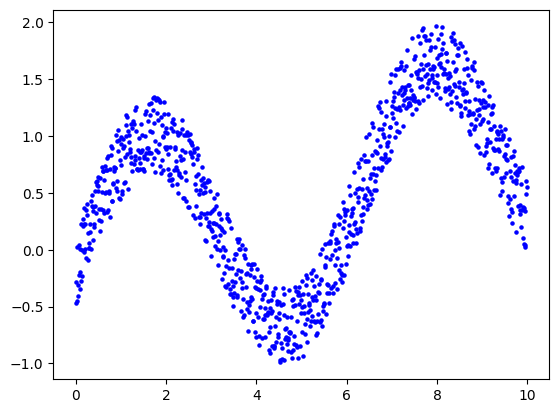

In [51]:
np.random.seed(21)

N =1000

def makeData(x):
    r = [a/10 for a in x]
    y = np.sin(x)+np.random.uniform(-0.5, 0.2, len(x))
    return np.array(y+r)

x = [i/100 for i in range(N)]
y = makeData(x)
x = np.array(x).reshape(-1,1)

plt.scatter(x,y,s=5,color="blue");

In [52]:
svr = SVR() # Por defecto el kernel es el RBF
svr.fit(x,y)

SVR()

In [53]:
yfit = svr.predict(x)

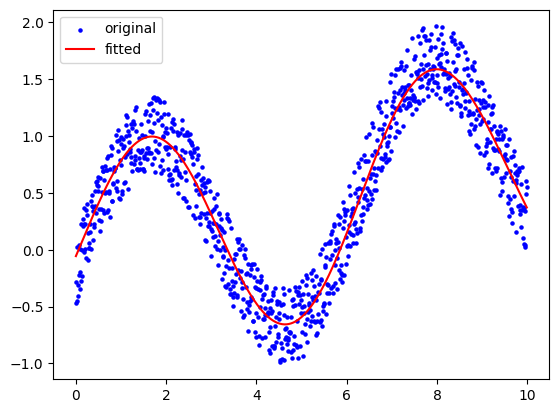

In [54]:
plt.scatter(x, y, s=5, color="blue", label='original')
plt.plot(x, yfit, color="red", label='fitted')
plt.legend()
plt.show()

In [55]:
score = svr.score(x, y)
print('R-squared:', score)
print('MSE:', mean_squared_error(y,yfit))

R-squared: 0.9201610722643554
MSE: 0.041676600207571246
